<a href="https://colab.research.google.com/github/alfybenny/CIrepo2/blob/main/system_bath_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install qutip 

In [11]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt



Coupling of a system with bath <br>
<h3>Approxmations</h3>
<ul>
<li>{k} states does not couple with each other</li>
<li>l couple with {k} with constant coupling V</li>
</ul>



In [80]:
# basis
N = 200
l = basis(N, 0)

# Defining bath basis
bath = []
for i in range(1, N):
  k_i = basis(N, i)
  bath.append(k_i)
# Defining energy
E_n = []
for i in range(0, N):
  j = (i + 1)
  E_n.append(j)

# Defining time indipendent hamiltonian
H0 = 100*l*l.dag()

for i in range(0, N-1):
  kH_i = E_n[i+1]*bath[i]*bath[i].dag()
  H0 += kH_i


In [81]:
# Defining time dependent hamiltonian
V1 = 0.1
V2 = 0.5
V3 = 0.9

H_t1 = 0

for i in range(0, N-1):
  kH_i = V1*(bath[i]*l.dag() + l*bath[i].dag())
  H_t1 += kH_i

H_t2 = 0

for i in range(0, N-1):
  kH_i = V2*(bath[i]*l.dag() + l*bath[i].dag())
  H_t2 += kH_i

H_t3 = 0

for i in range(0, N-1):
  kH_i = V3*(bath[i]*l.dag() + l*bath[i].dag())
  H_t3 += kH_i
 

In [82]:
# Solve 
H1 = H0 + H_t1
H2 = H0 + H_t2
H3 = H0 + H_t3

time = np.linspace(0, 100, 1000)
exp_operators = [l*l.dag()]

result1 = sesolve(H1, l, time, exp_operators)
result2 = sesolve(H2, l, time, exp_operators)
result3 = sesolve(H3, l, time, exp_operators)


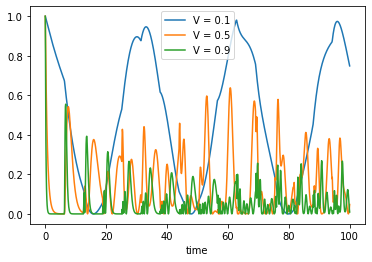

In [83]:
plt.plot(result1.times, result1.expect[0], label = 'V = 0.1')
plt.plot(result2.times, result2.expect[0], label = 'V = 0.5')
plt.plot(result3.times, result3.expect[0], label = 'V = 0.9')
plt.xlabel('time')
plt.legend()